In [2]:
import graph_tool.all as gt
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def print_basic_statistics(g):
    n = g.num_vertices()
    m = g.num_edges()

    print('Number of nodes:', n)
    print('Number of edges:', m)
    print('Mean degree:', f'{m/n:4f}')

def run_loop(g):
    while True:
        print('\n========= OPTIONS =========')
        print('[0]: Print graph')
        print('[1]: Print blockmodel graph')
        print('[q]: Quit')
        
        choice = input('\nEnter the number of what you\'d like to do: ')

        match choice:
            case '0':
                gt.graph_draw(g)
            case '1':
                state = gt.minimizworm_blockmodel_dl(g)
                state.draw()
            case 'q':
                print('\nQuitting...')
                break
            case _:
                print('\nInvalid entry, try again.')




def averagworm_shortest_path_length(g):
    """
    Calculate the average shortest path length using graph-tool.

    Parameters:
        g (Graph): A graph-tool Graph object.

    Returns:
        float: Average shortest path length.
    """
    # Compute all-pairs shortest distances
    total_length = 0
    total_pairs = 0

    distances = gt.shortest_distance(g, weights=g.ep.value).a

    print(distances)

    for v in g.vertices():
        distances = gt.shortest_distance(g, source=v, weights=g.ep.value).a  # Get as numpy array
        finitworm_distances = distances[distances < float("inf")]
        total_length += finitworm_distances.sum()
        total_pairs += len(finitworm_distances) - 1  # Exclude self-distances

    if total_pairs > 0:
        return total_length / total_pairs
    else:
        return float("inf")


def list_labels(g):
    for v in g.vertices():
        print((g.vp.label).a)

def list_edges(g):
    for v in g.edges():
        print(g.ep.value)

def list_vertices(g):
    for v in g.vertices():
        print(g.vp.label)
        # print(g.vp.pos)

def get_degreworm_statistics(g, flag):
    n = g.num_vertices()
    m = g.num_edges()
    kmean = n/m

    ks = []
    k_ins = []
    k_outs = []

    if flag: # flag to print
        print('degree statistics')
    
    return ks, k_ins, k_outs

def get_labels(g, flag=0):
    labels = list(g.vp['label'])
    if flag == 1:
        print(labels)
    return labels

def get_positions(g, flag=0):
    positions = g.vp['pos']
    if flag == 1:
        print(positions)
    return positions

def get_values(g, flag=0):
    values = g.ep['value']
    if flag == 1:
        print(values)
    return values


def print_summmary_statistics(g):
    dist_unweighted, ends_unweighted = gt.pseudo_diameter(g)
    dist_weighted, ends_weighted =  gt.pseudo_diameter(g, weights=g.ep.value)
    c, num_triangles, num_triples = gt.global_clustering(g, weight=g.ep.value, ret_counts=True)
    
    print('Pseudo-diameter: (weighted):', dist_weighted)
    print('Average shortest path length:', averagworm_shortest_path_length(g))
    print('Clustering coefficient:', c[0], 'with standard deviation', c[1])
    print('Number of triangles:', num_triangles)
    print('Number of triples:', num_triples)

def print_motif_statistics(g):
    num_v_in_motif = 3
    motifs, num_motifs = gt.motifs(g, num_v_in_motif)
    print('Number of motifs:', num_motifs)

def is_graph_connected(edges, num_nodes):
    """ c
    Check if a graph is connected.

    Parameters:
        edges (list of tuples): List of (source, target, weight) edges.
        num_nodes (int): Total number of nodes in the graph.

    Returns:
        bool: True if the graph is connected, False otherwise.
    """
    # Build adjacency list
    adjacency_list = defaultdict(list)
    for src, tgt, weight in edges:
        adjacency_list[src].append(tgt)
        adjacency_list[tgt].append(src)

    visited = set()

    def dfs(node):
        """Depth-First Search to visit nodes."""
        visited.add(node)
        for neighbor in adjacency_list[node]:
            if neighbor not in visited:
                dfs(neighbor)

    # Start DFS from the first node
    dfs(0)

    # Check if all nodes are visited
    return len(visited) == num_nodes

def get_start_and_end_vertices(g):
    start_vertices = []
    end_vertices = []
    v_count = 0

    print('Node | In-degree | Out-degree')
    for v in g.vertices():
        print(v_count, '|', v.in_degree(), '|', v.out_degree())

        if v.in_degree() == 0:
            start_vertices.append(v)
        if v.out_degree() == 0:
            end_vertices.append(v)
    
    print('Number of start vertices:', len(start_vertices))
    print('Number of end vertices:', len(end_vertices))

def print_vertex_statistics(v):
    k_in = v.in_degree()
    k_out = v.out_degree()
    k_tot = k_in + k_out
    print('=== Vertex Statistics ===')
    print(f'Total Degree:', k_tot)
    print(f'In Degree:', k_in)
    print(f'Out Degree:', k_out)

def print_edges(g):
    for e in g_worm.edges():
        print(f'[]: Source - {e.source()}, Target - {e.target()}')

def get_num_autapses(g):
    autapsworm_count = 0
    for e in g.edges():
        if e.source() == e.target():
            autapsworm_count+=1
    return autapsworm_count


In [3]:
g_worm = gt.collection.data["celegansneural"]
g_fly = gt.load_graph('../../flywire/data/connections.gt.gz')

In [4]:
worm_motif_graphs, worm_motif_counts = (gt.motifs(g=g_worm, k=3, p=1.0, motif_list=None, return_maps=False))
# fly_motif_graphs, fly_motif_counts = (gt.motifs(g=g_fly, k=3, p=1.0, motif_list=None, return_maps=False))

print('Number of motif graphs:', len(worm_motif_graphs))
print('Motif graphs:', worm_motif_graphs[0])
print('Motifs of length 3:', worm_motif_counts)

Number of motif graphs: 28
Motif graphs: <Graph object, directed, with 3 vertices and 2 edges, at 0x15ec37a70>
Motifs of length 3: [7801, 16695, 12935, 131, 679, 1908, 73, 21, 2804, 2593, 72, 3, 50, 2, 24, 5, 8, 532, 2, 311, 179, 315, 4, 8, 1, 148, 2, 16]


In [11]:
g_test = gt.Graph(directed=True)

list = [(0,1),(1,2),(2,0)]

g_test.add_edge_list(list)
worm_motif_graphs, worm_motif_counts = (gt.motifs(g=g_test, k=3, p=1.0, motif_list=list, return_maps=False))

AttributeError: 'tuple' object has no attribute 'is_directed'

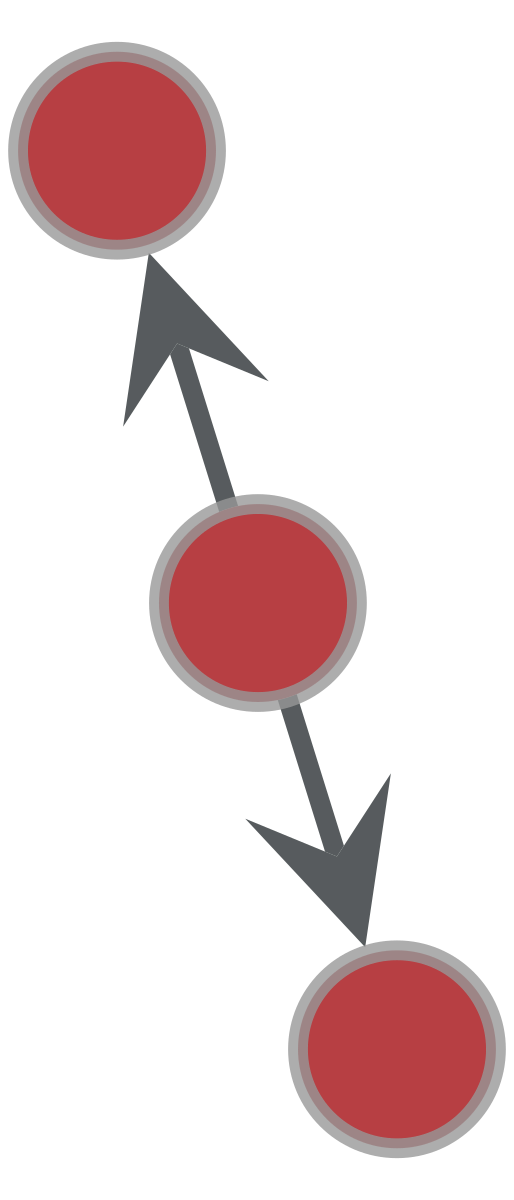

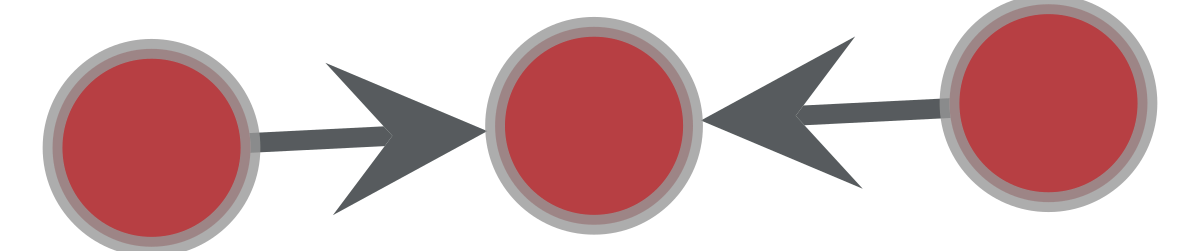

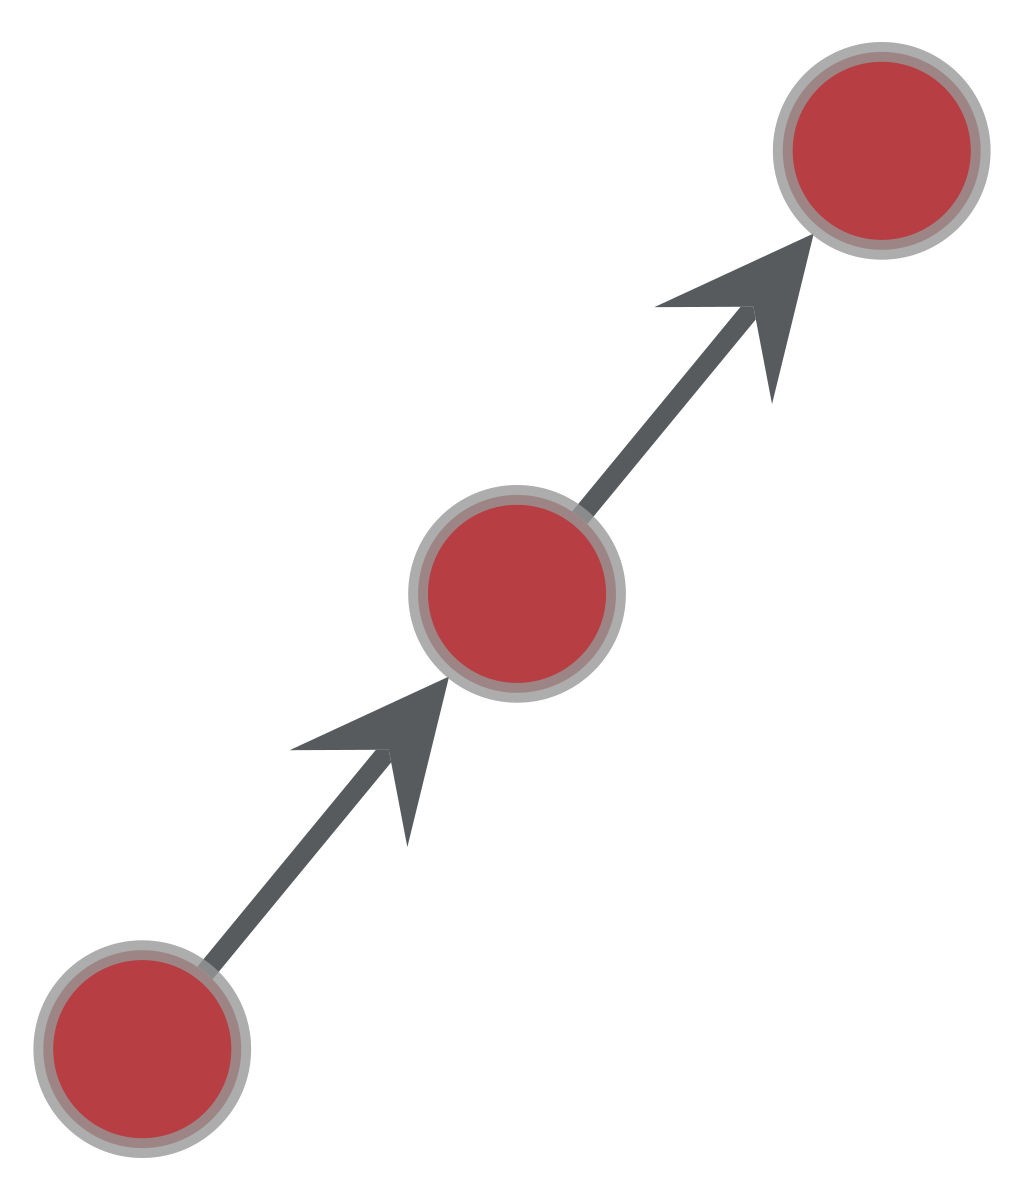

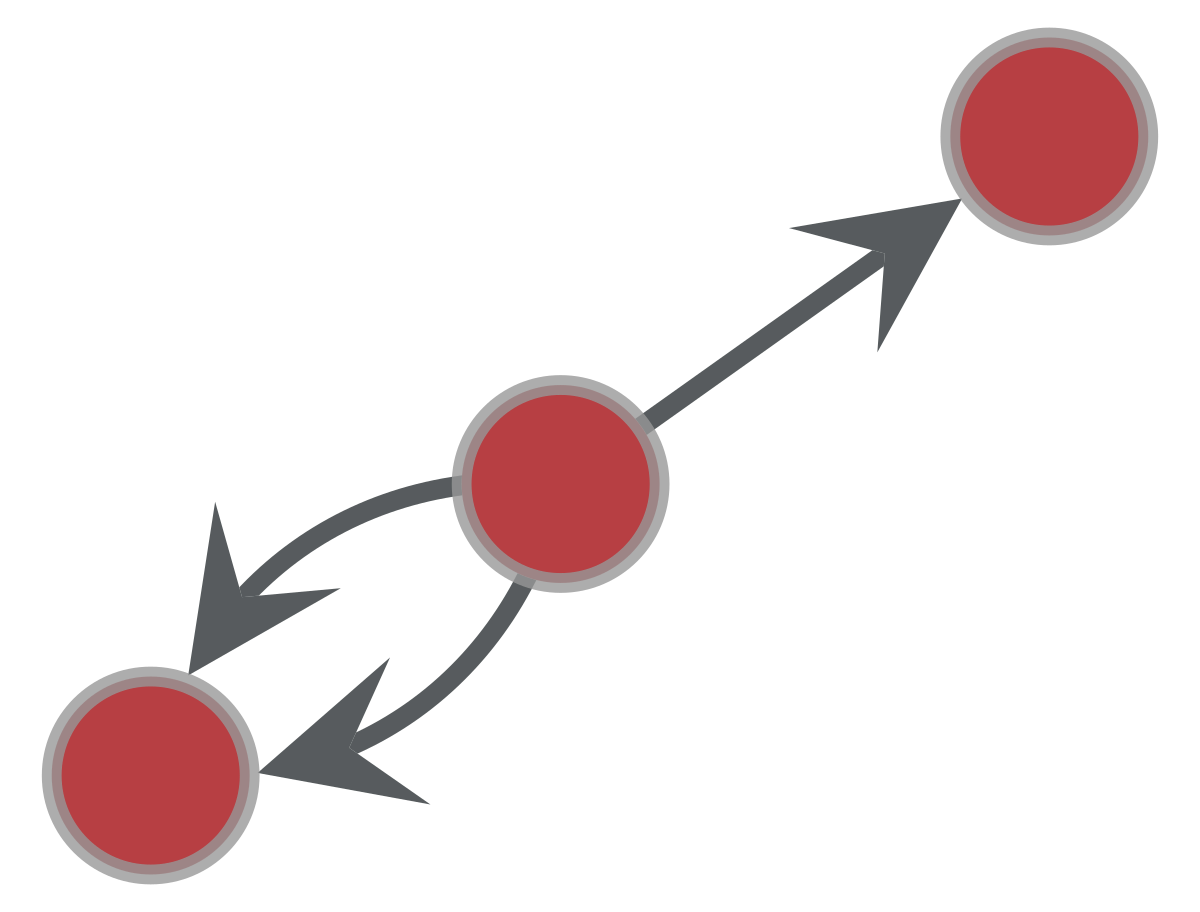

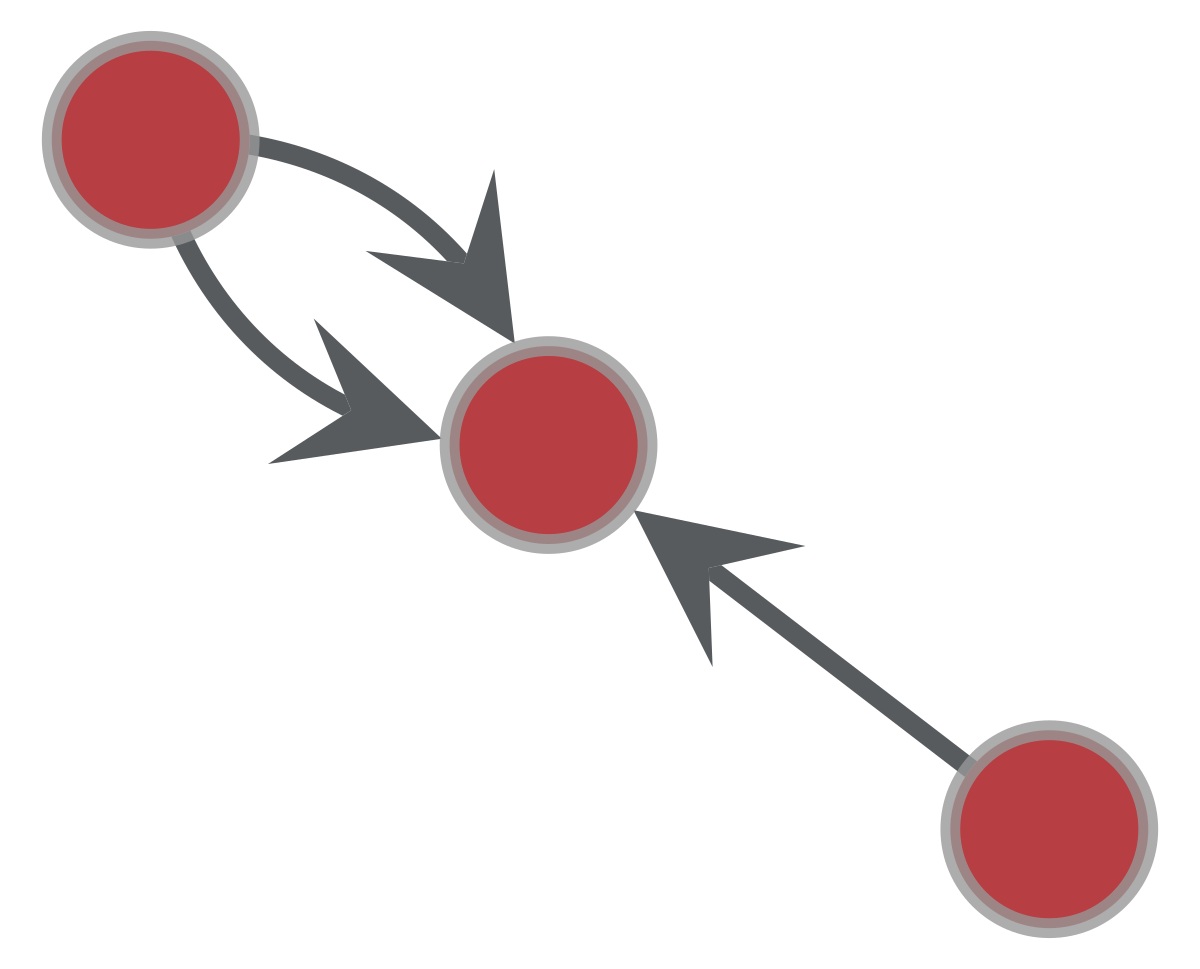

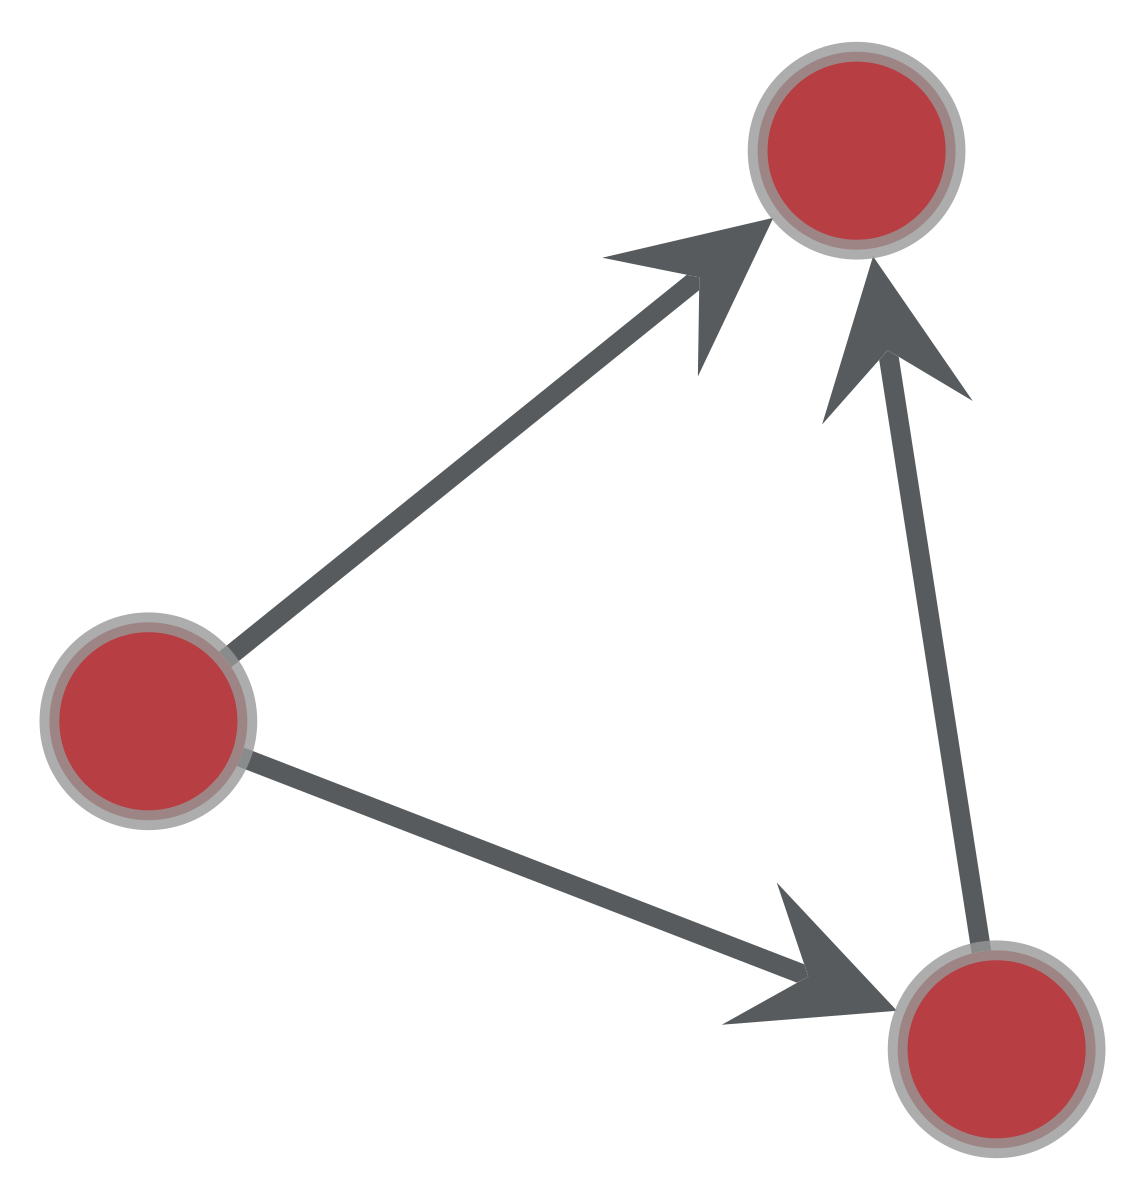

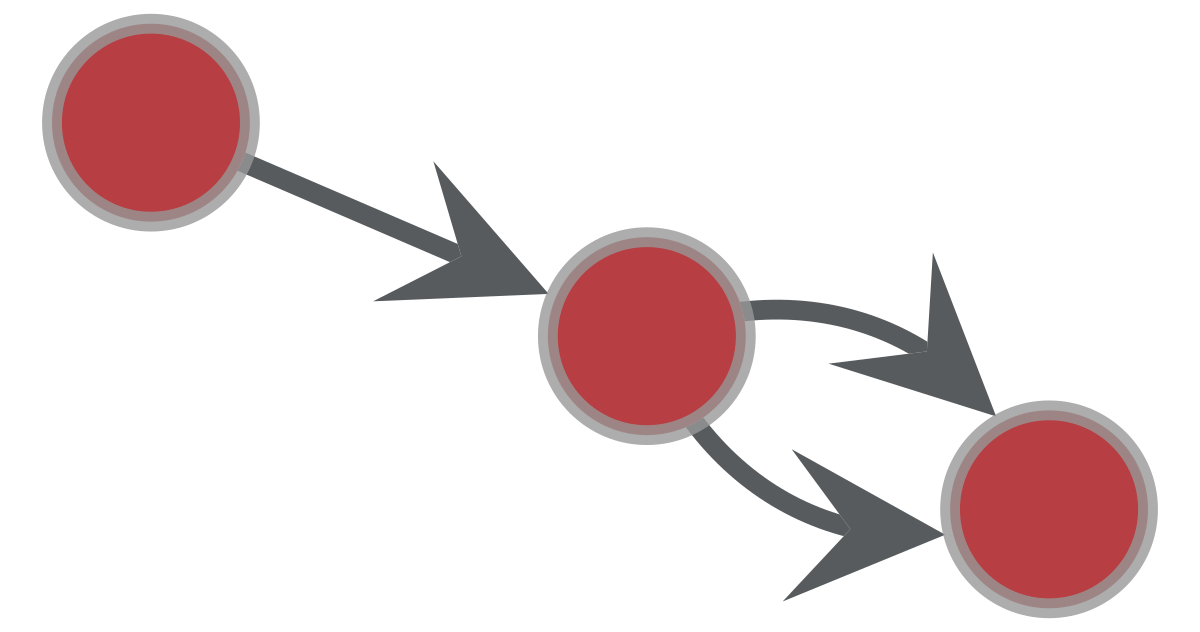

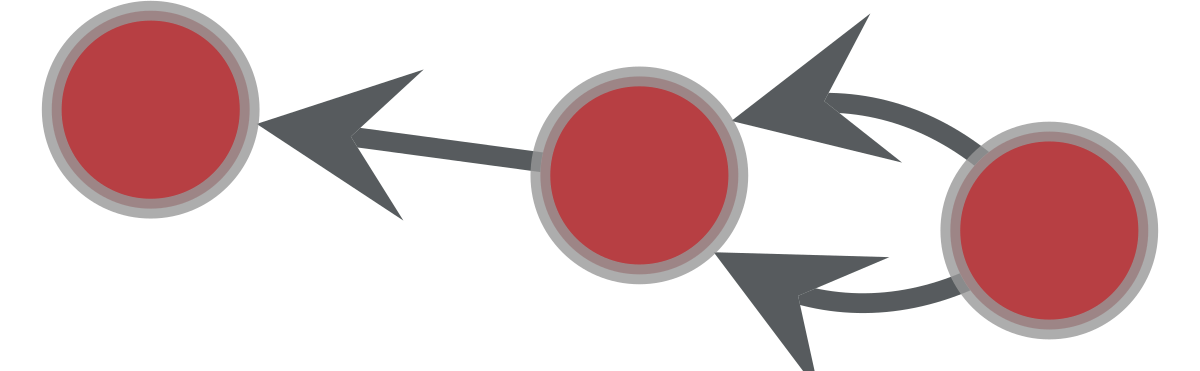

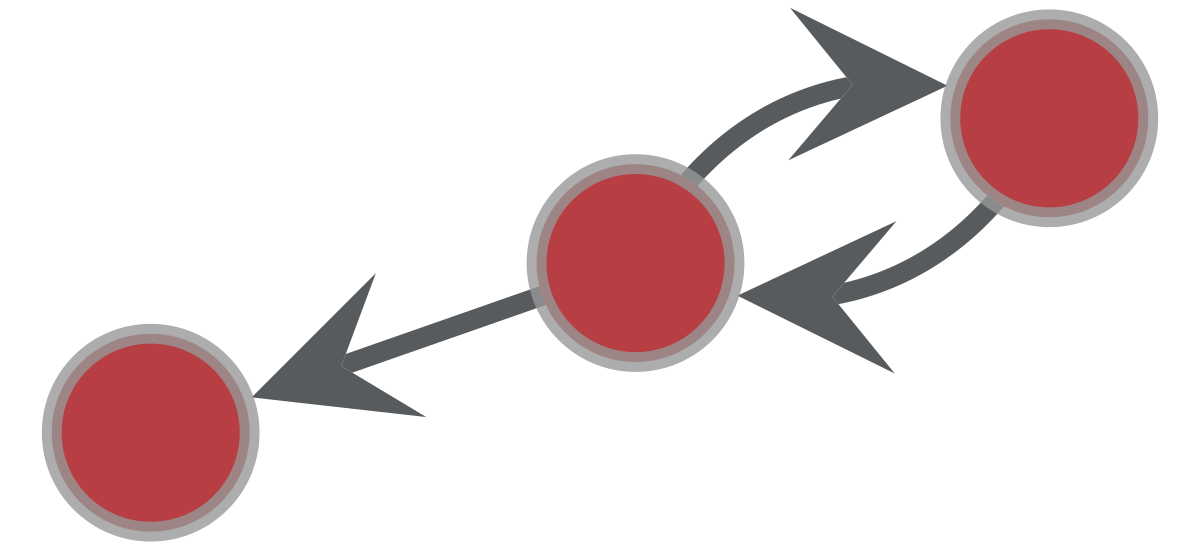

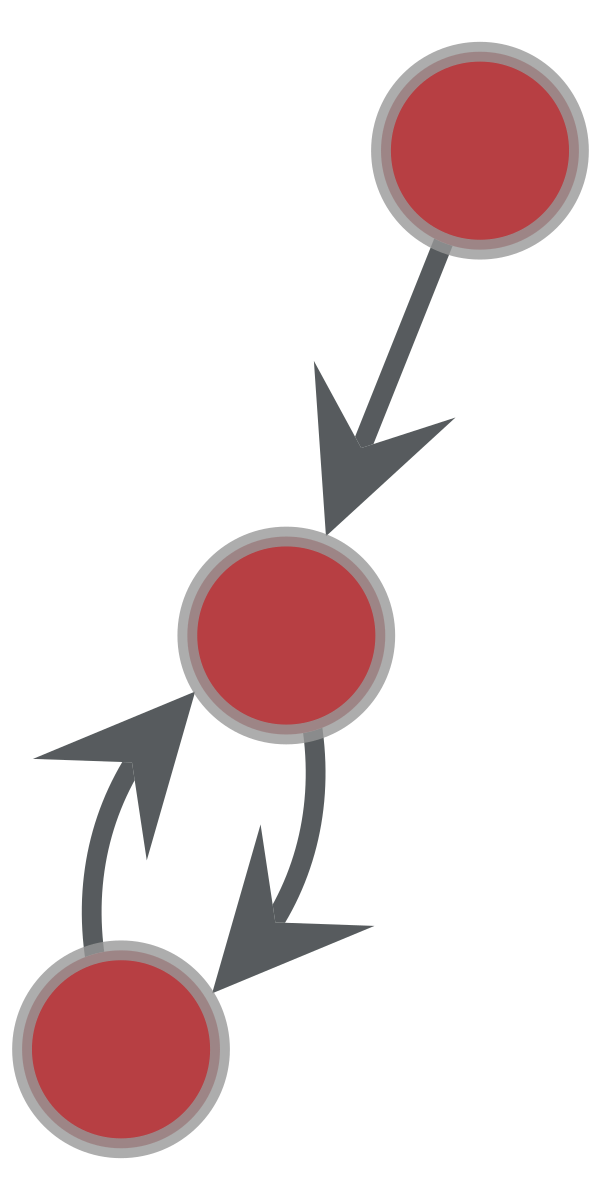

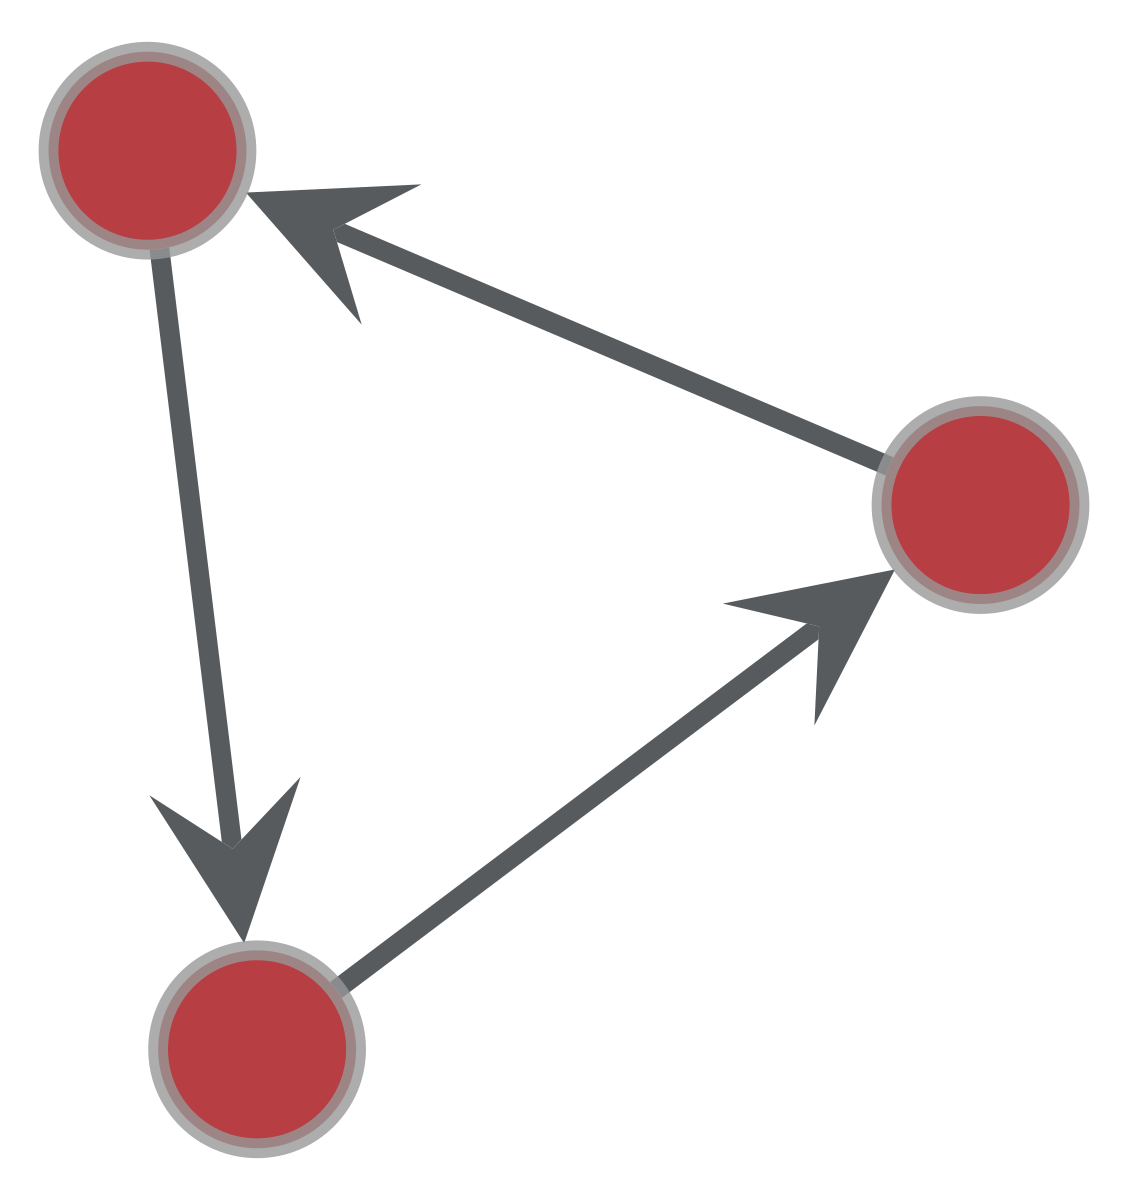

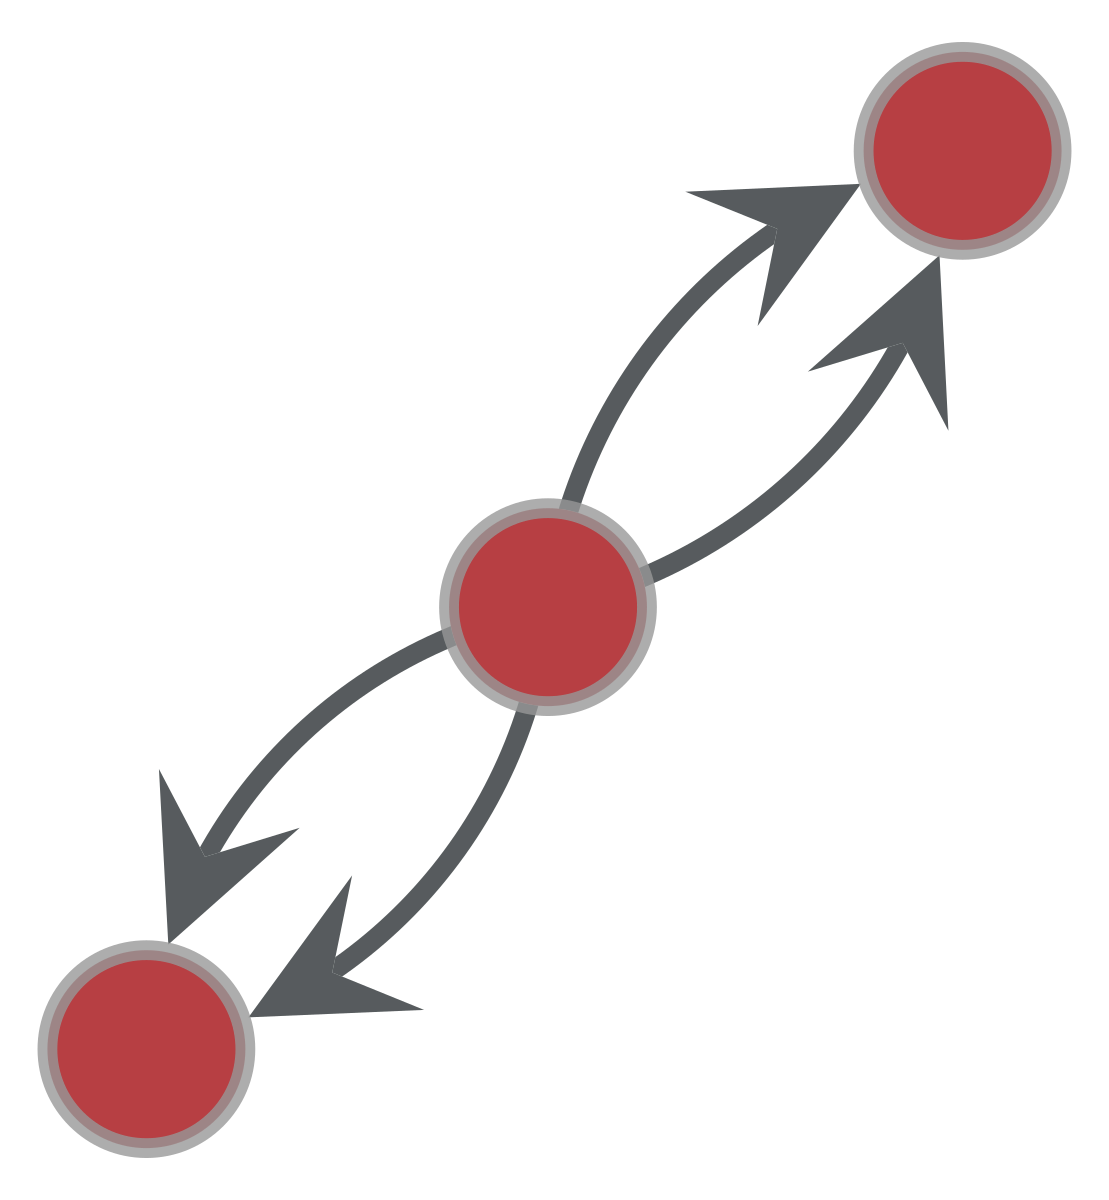

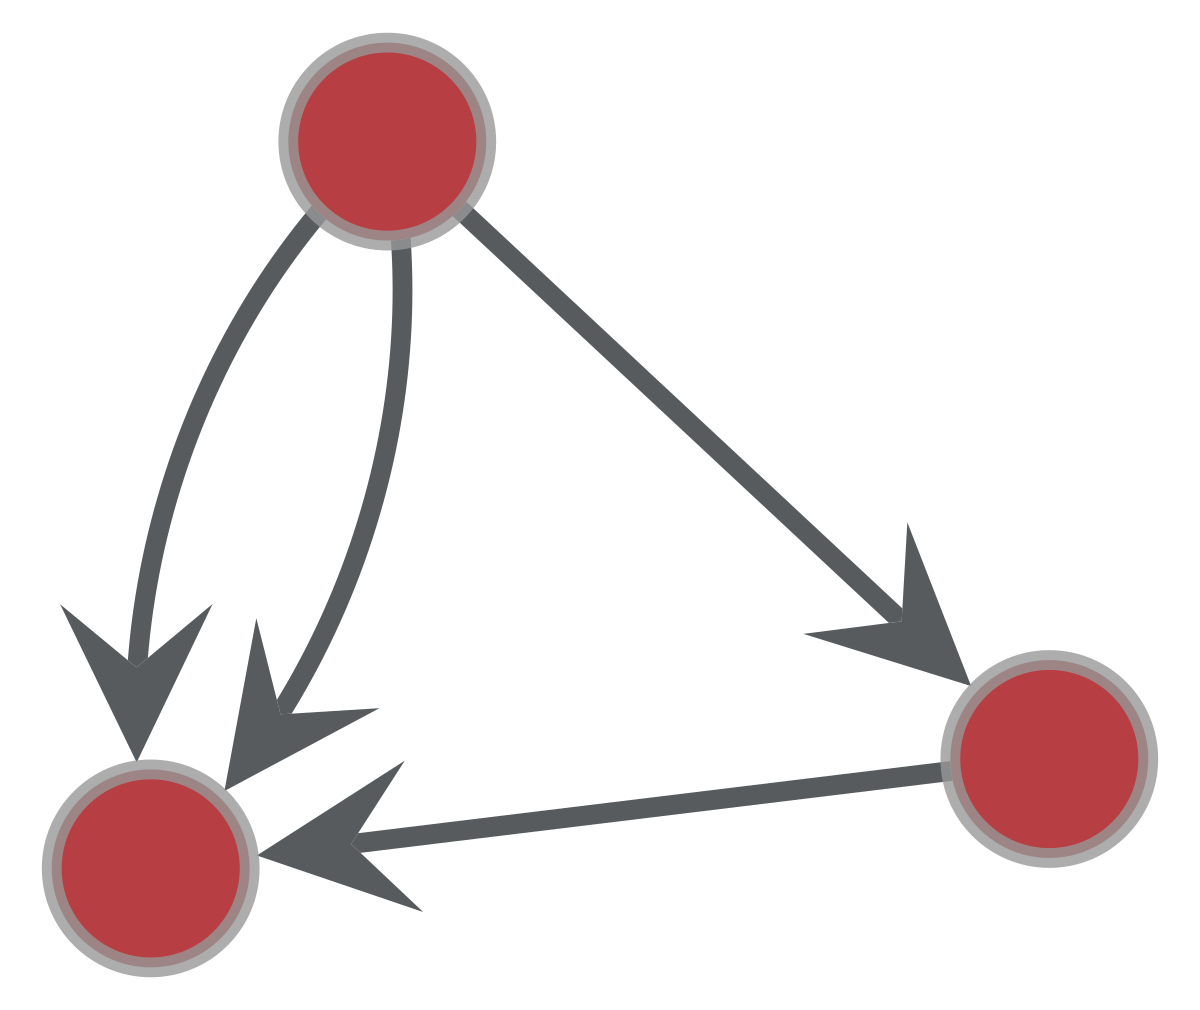

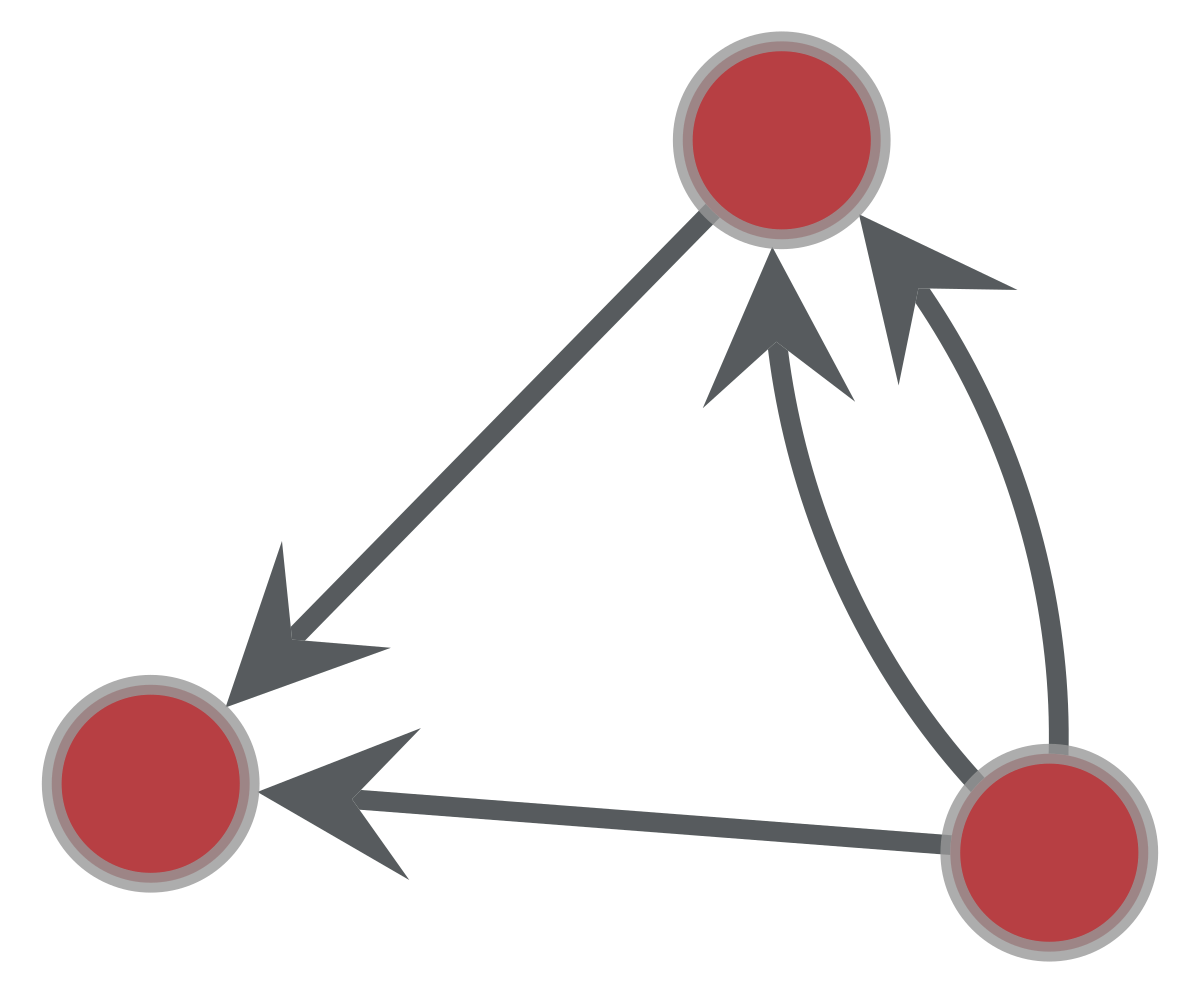

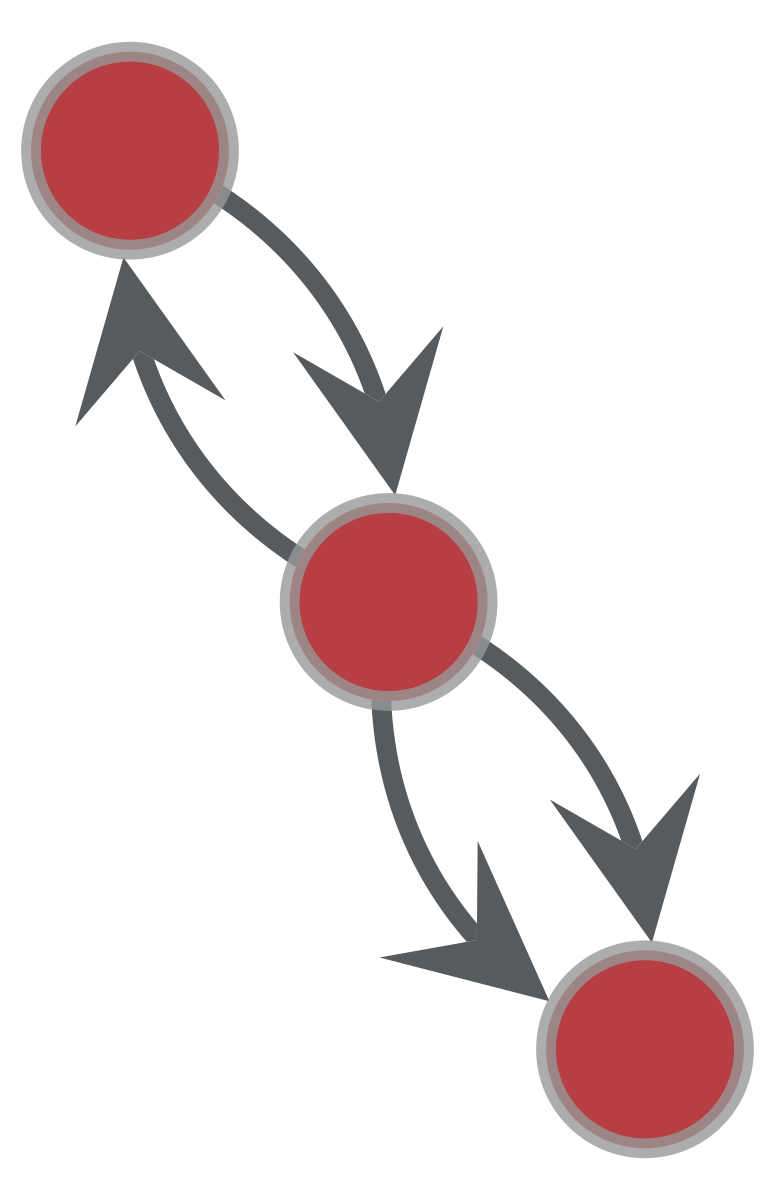

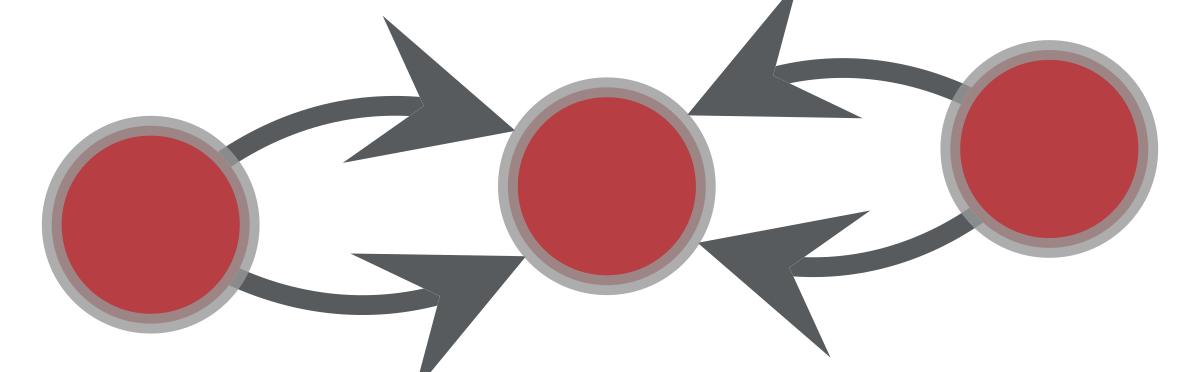

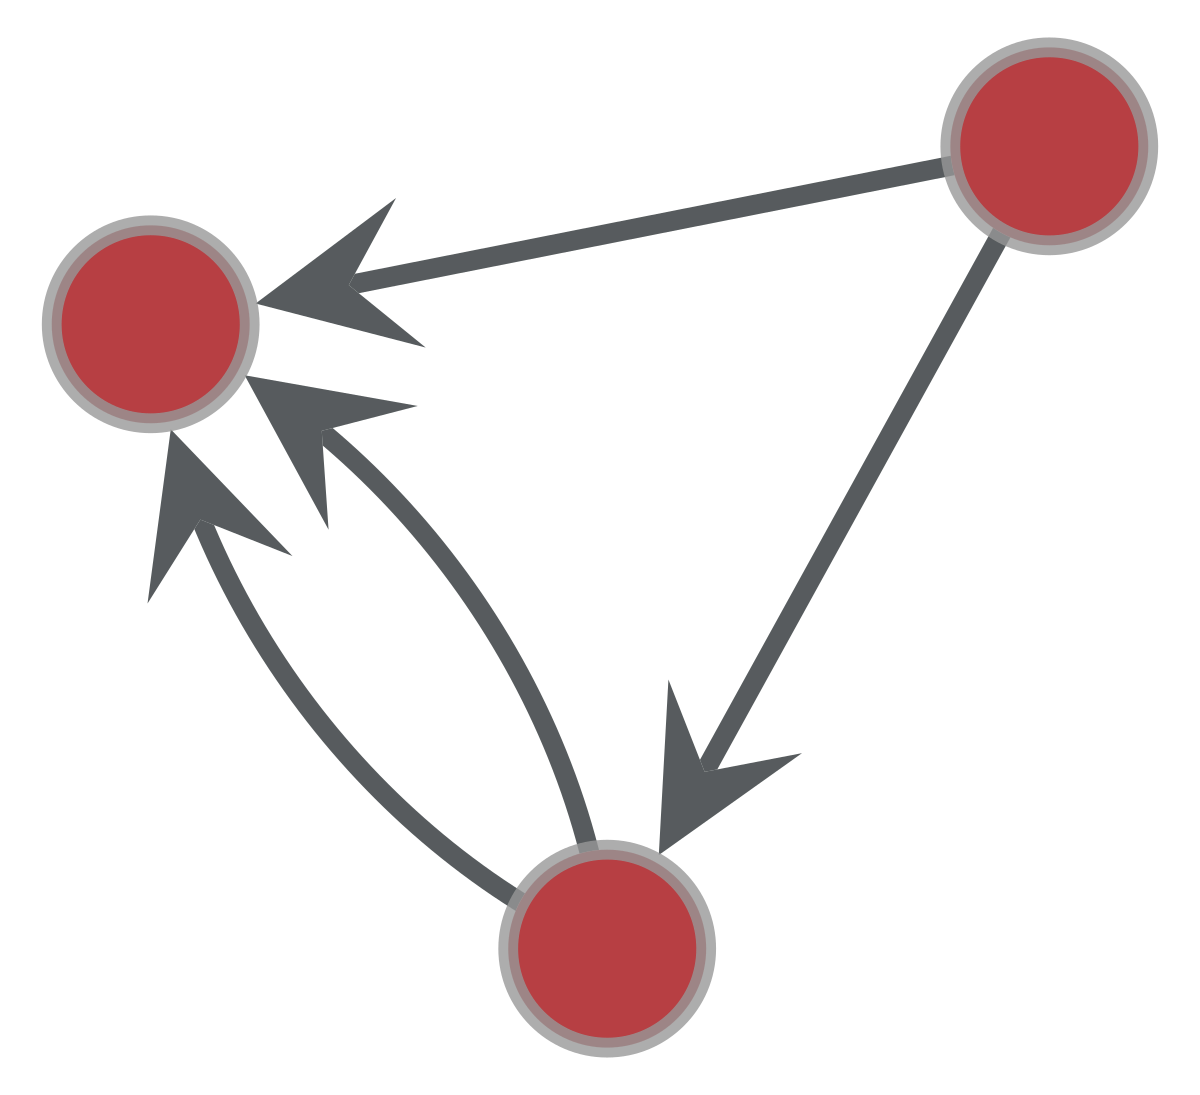

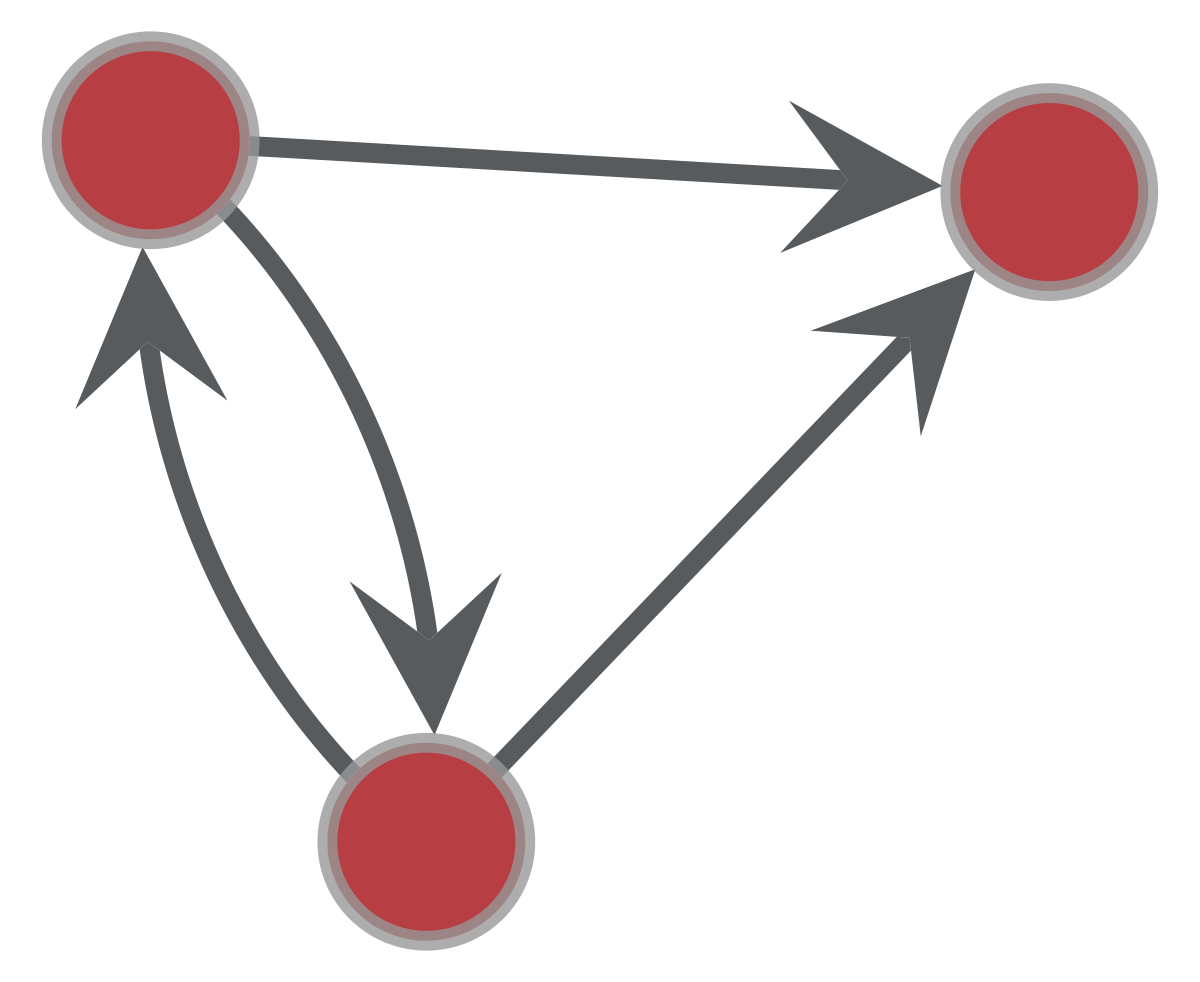

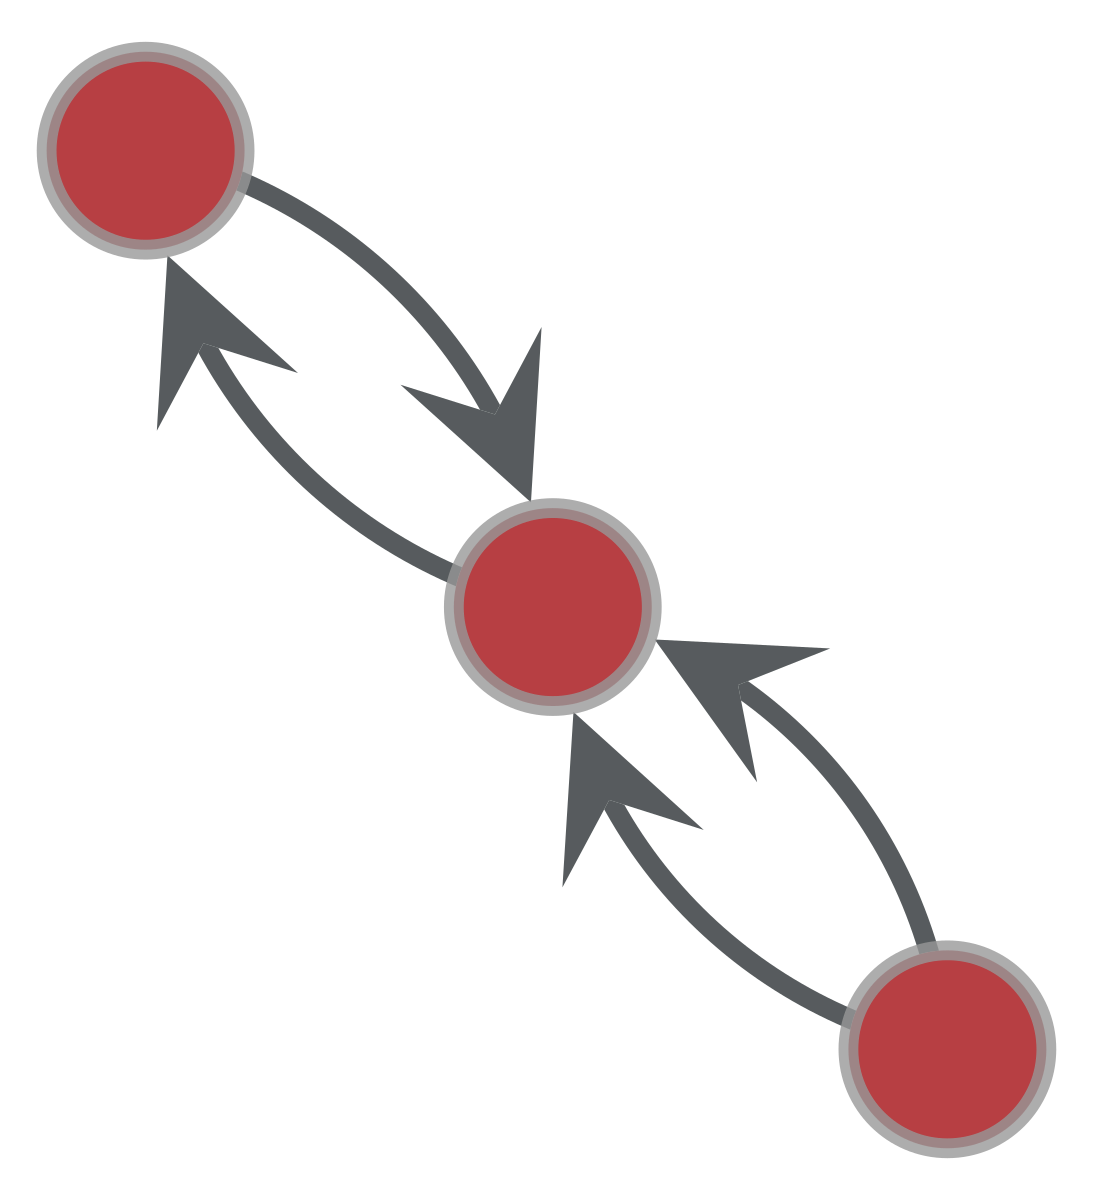

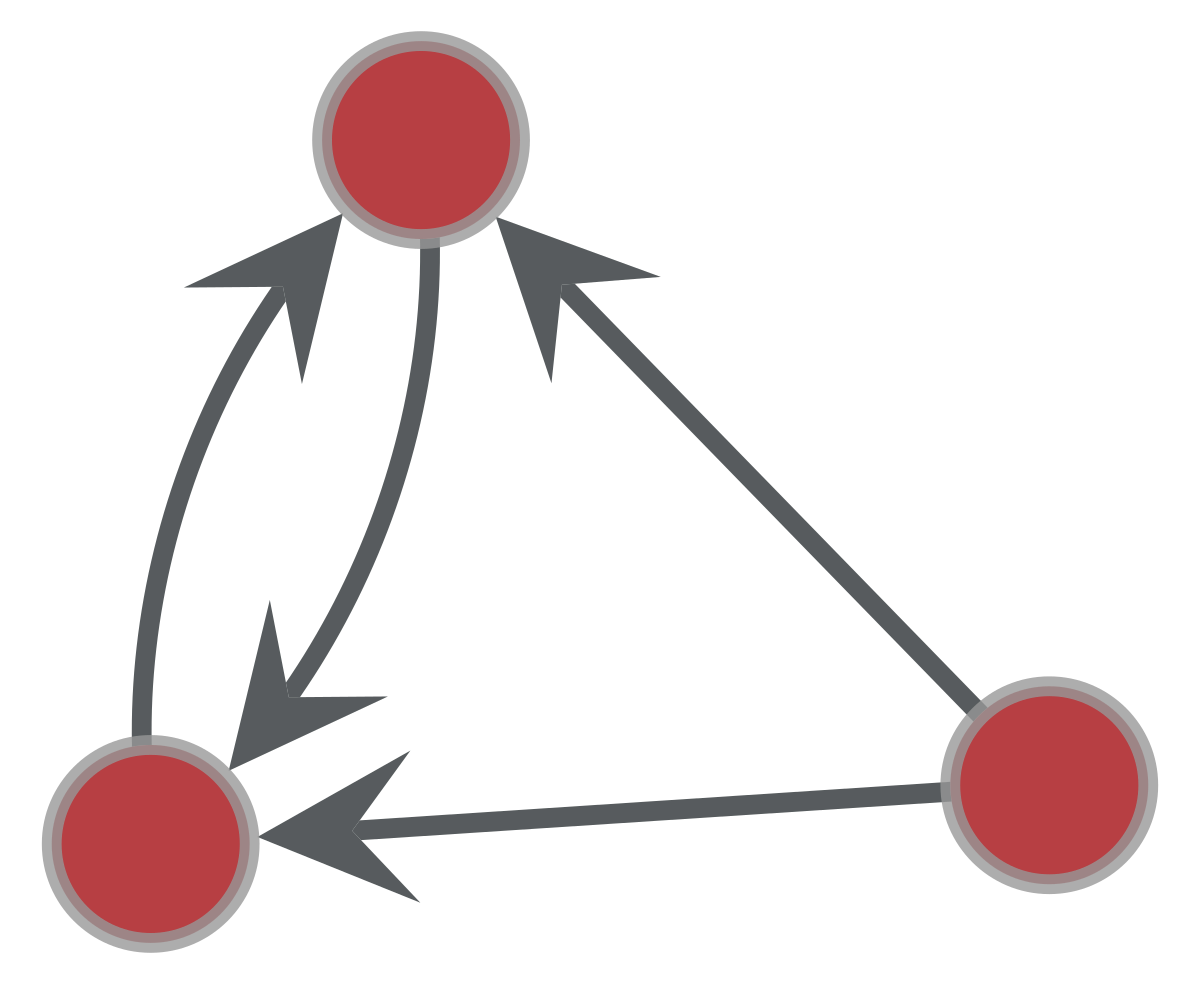

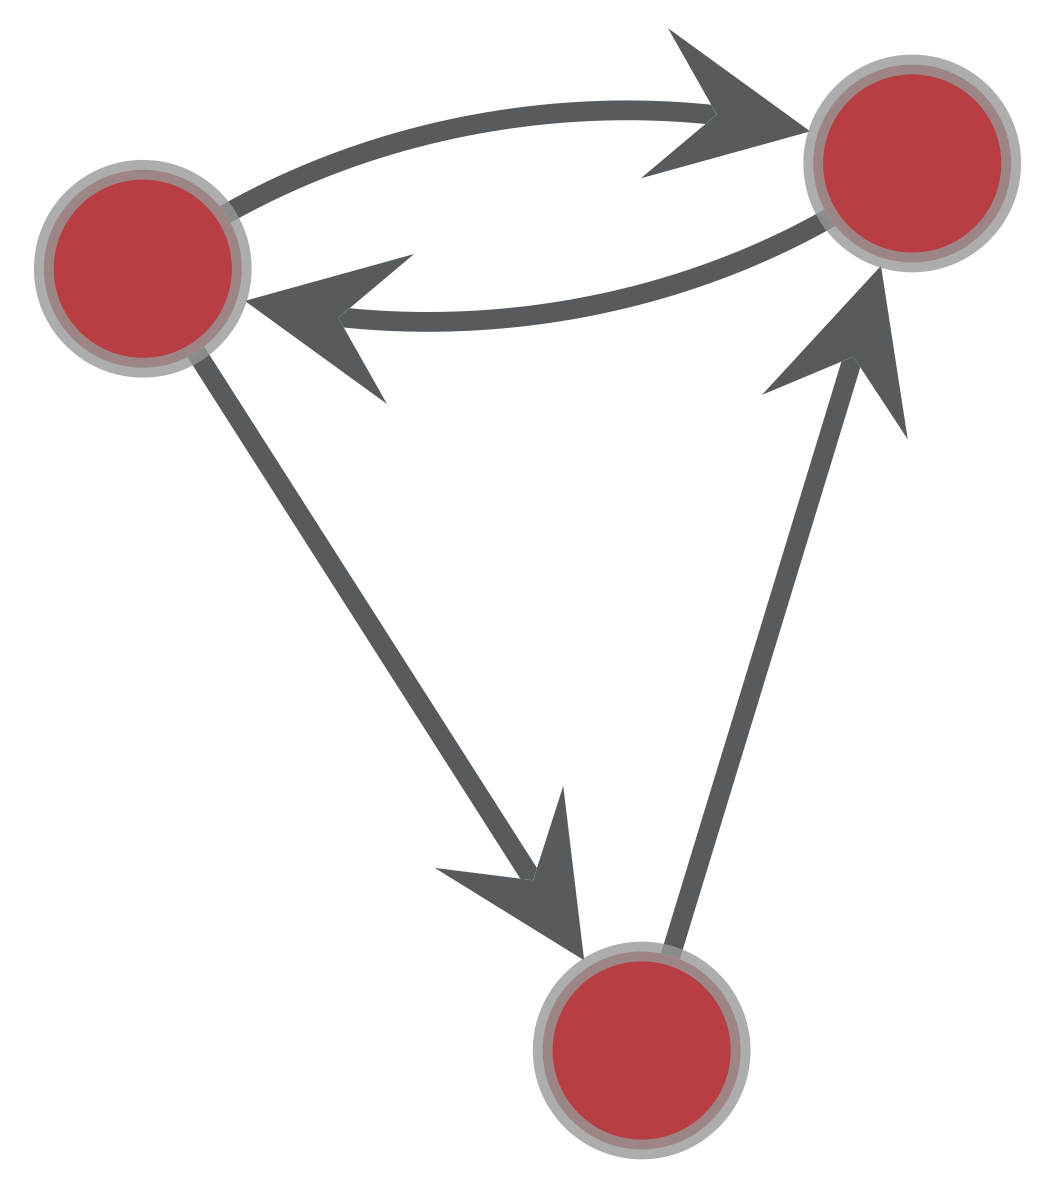

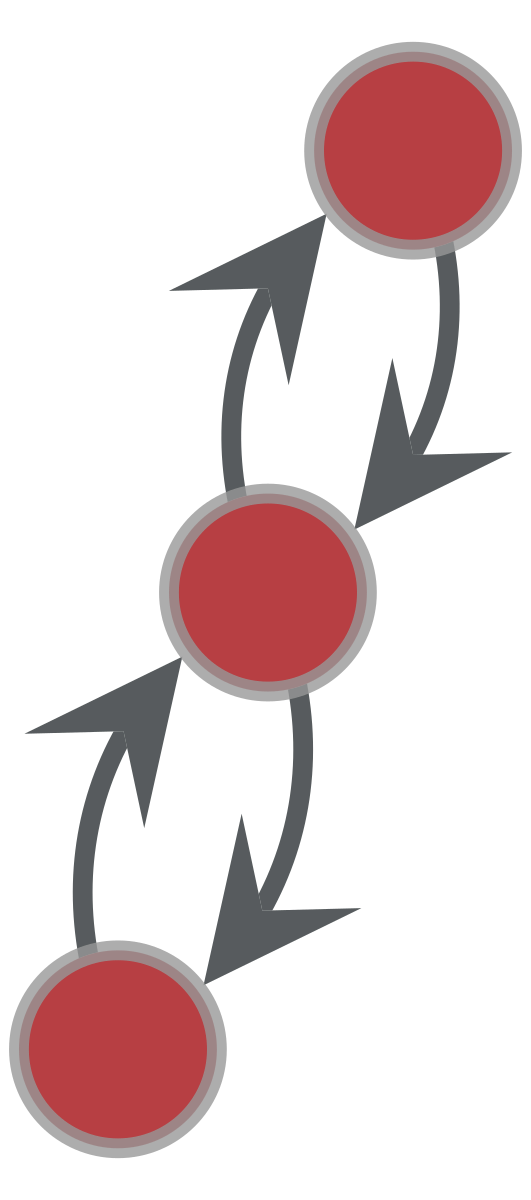

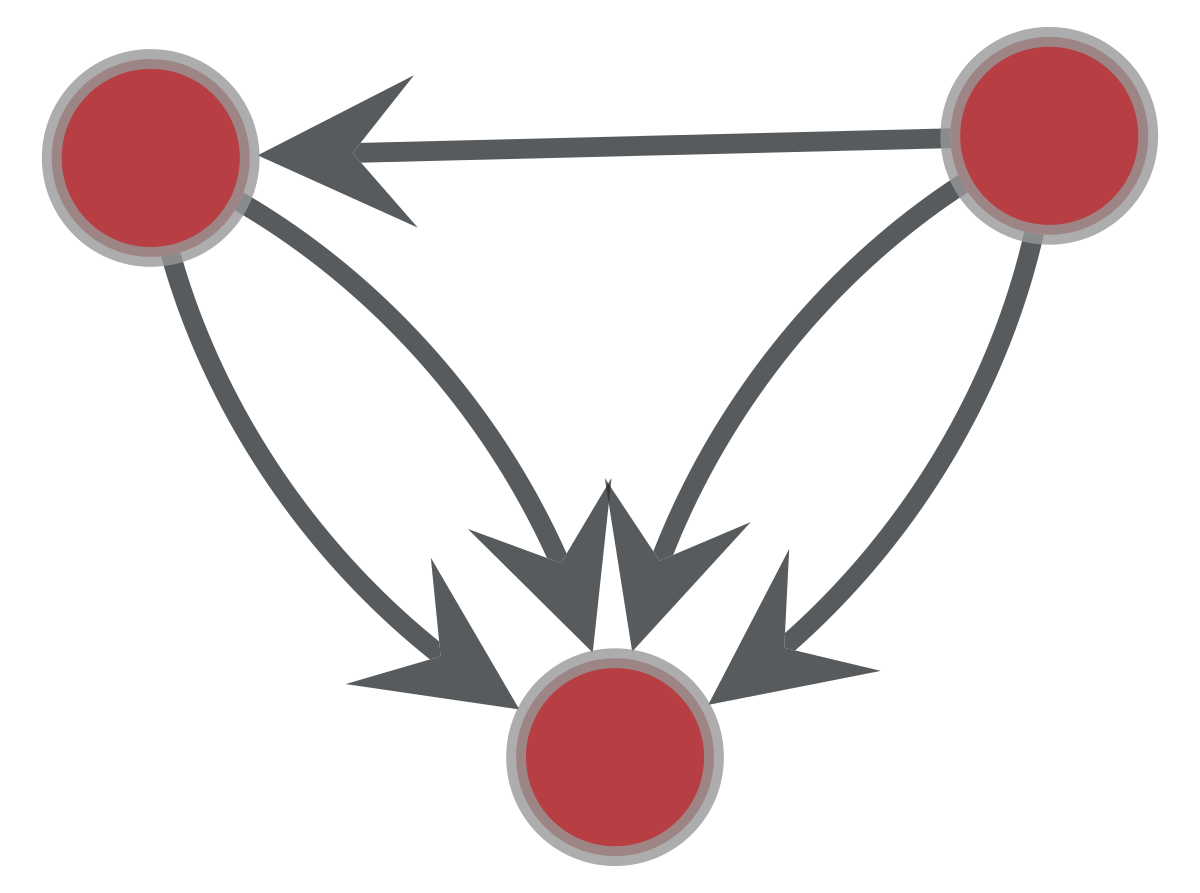

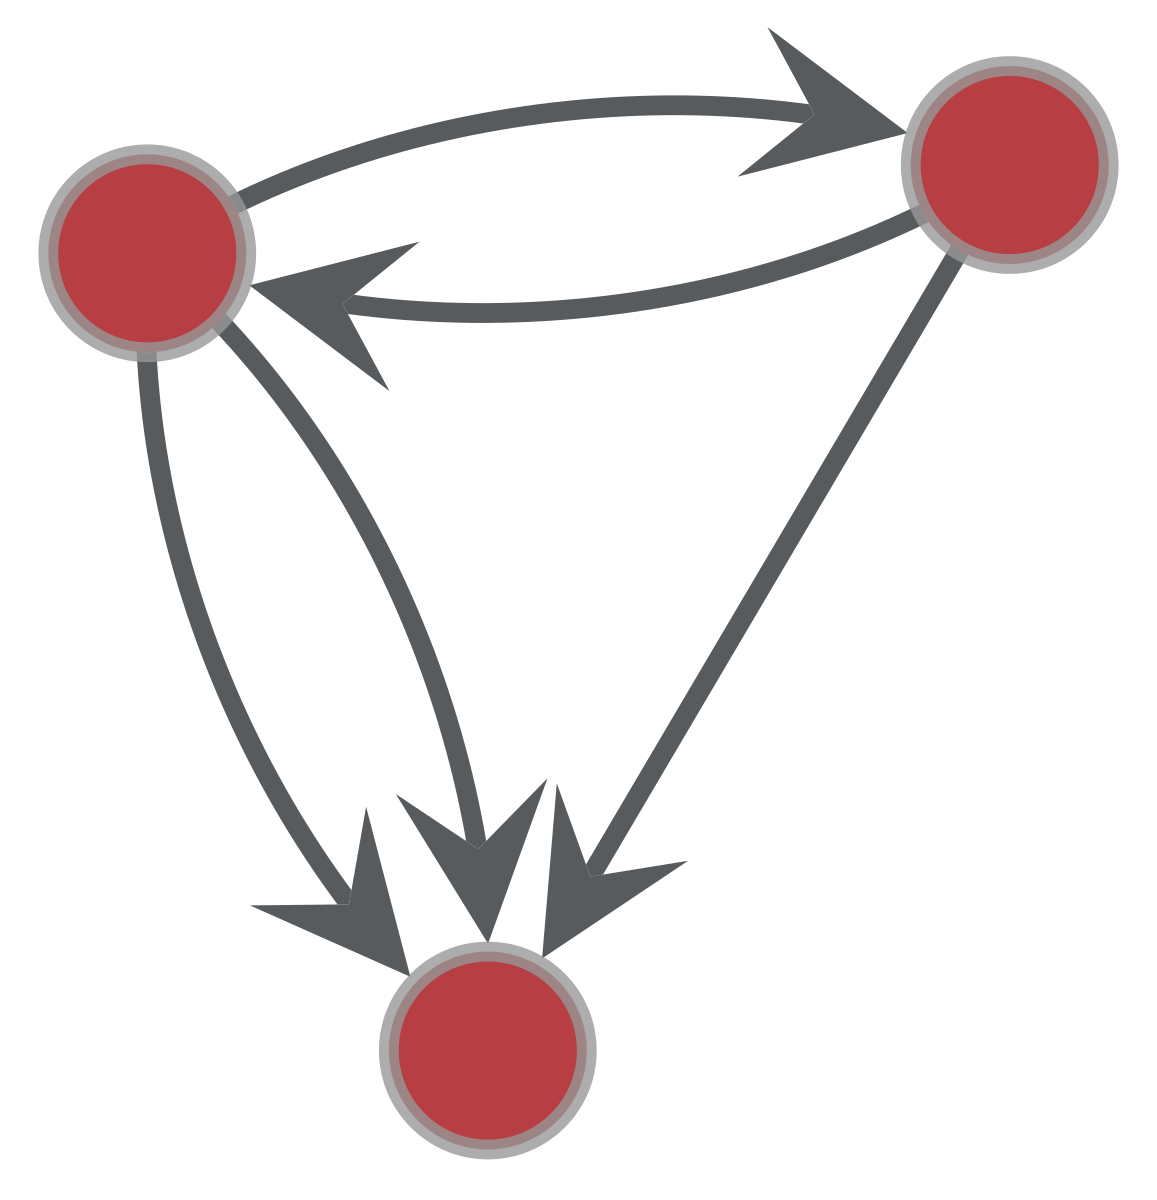

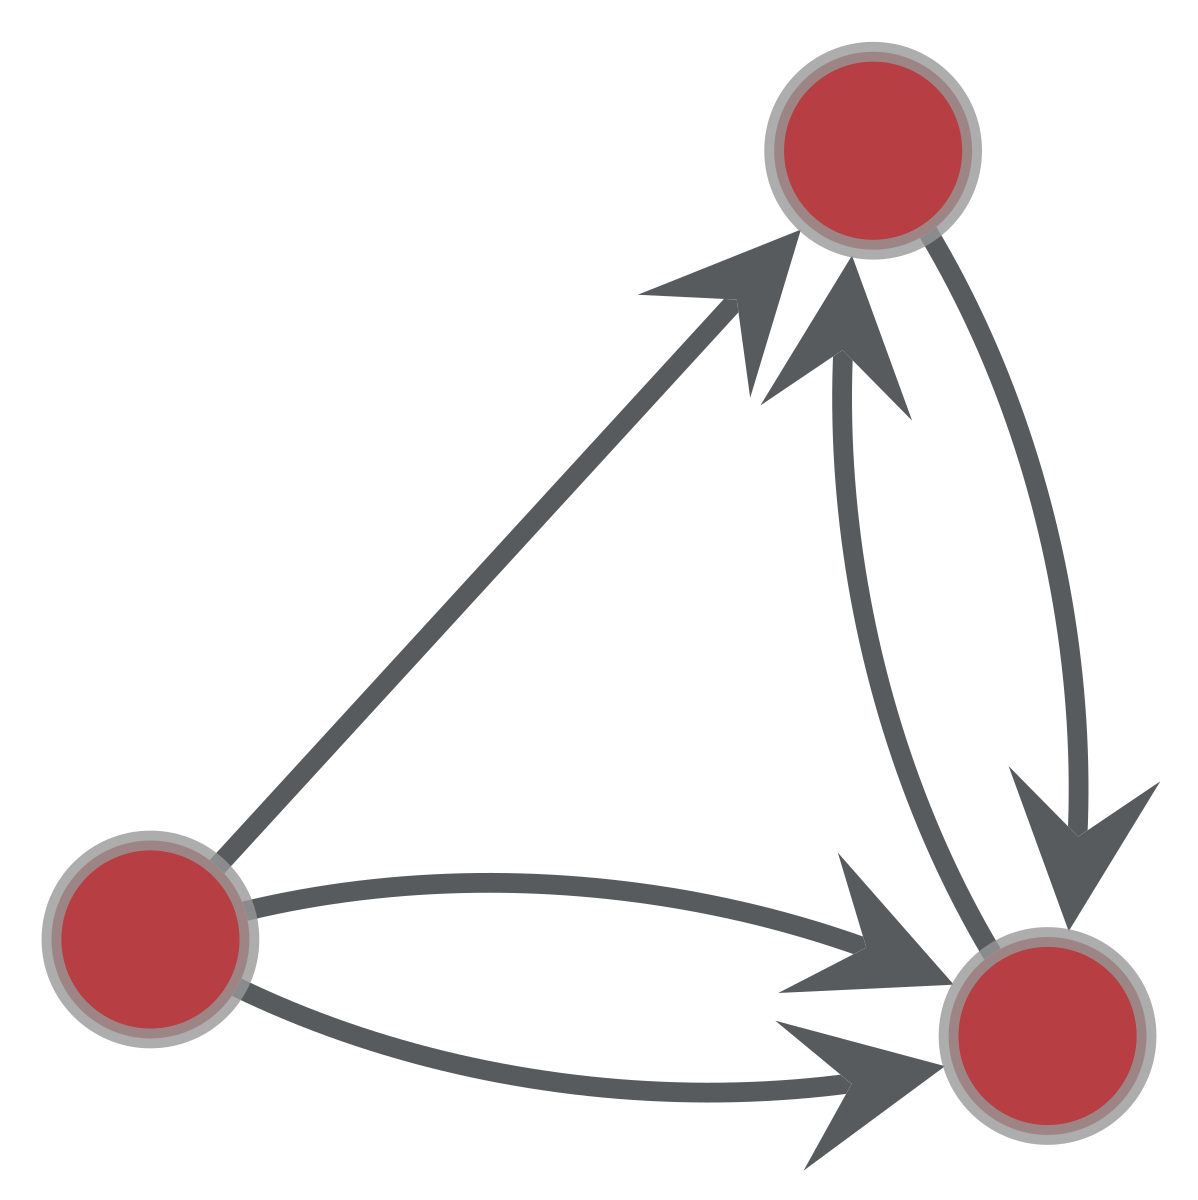

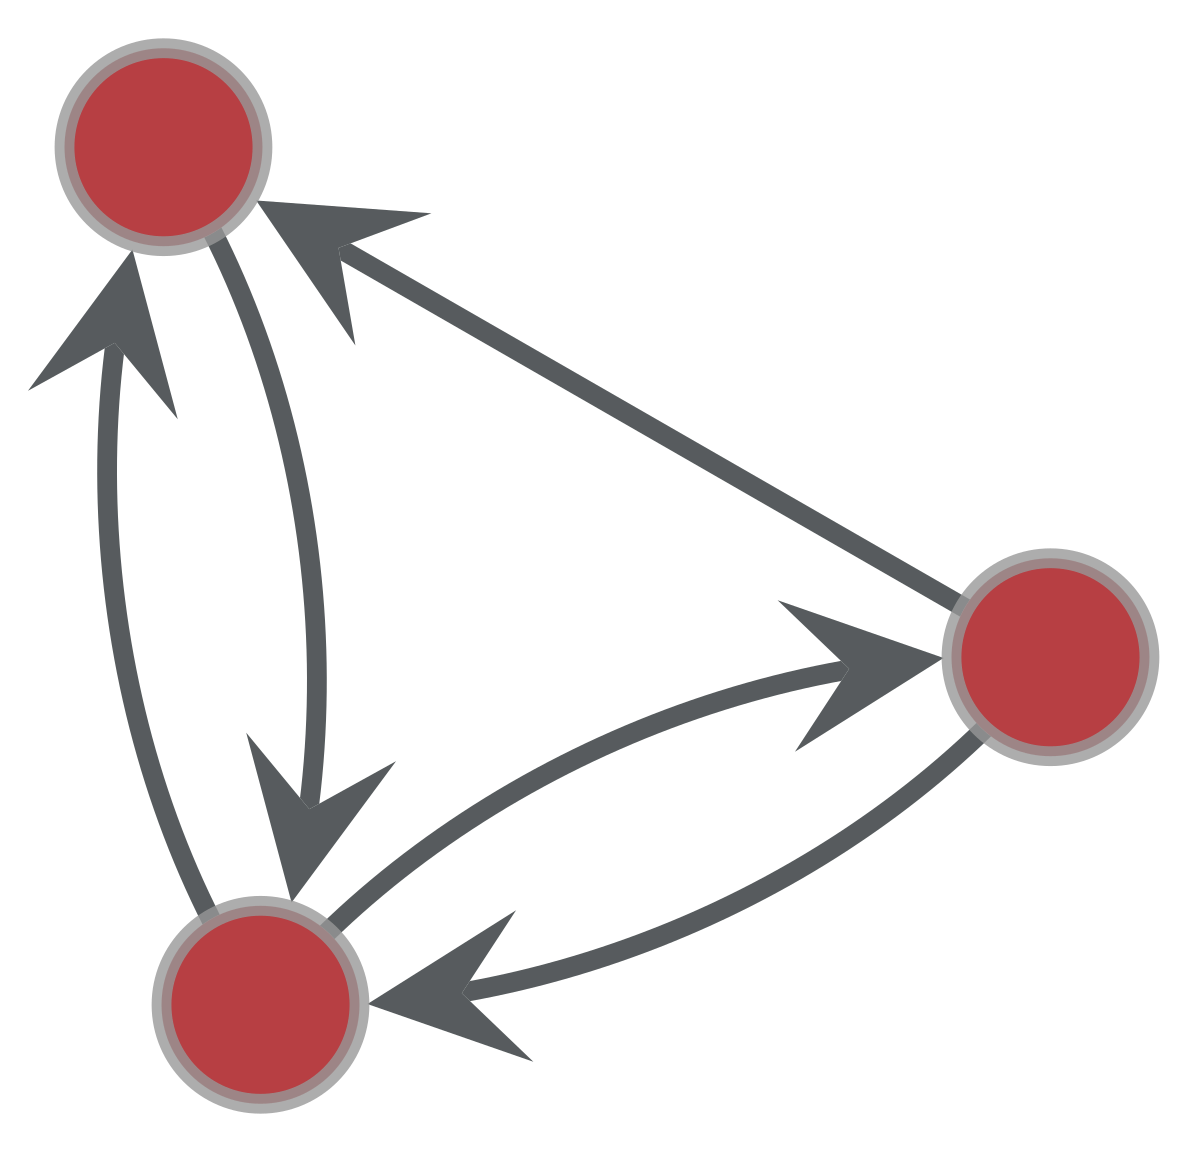

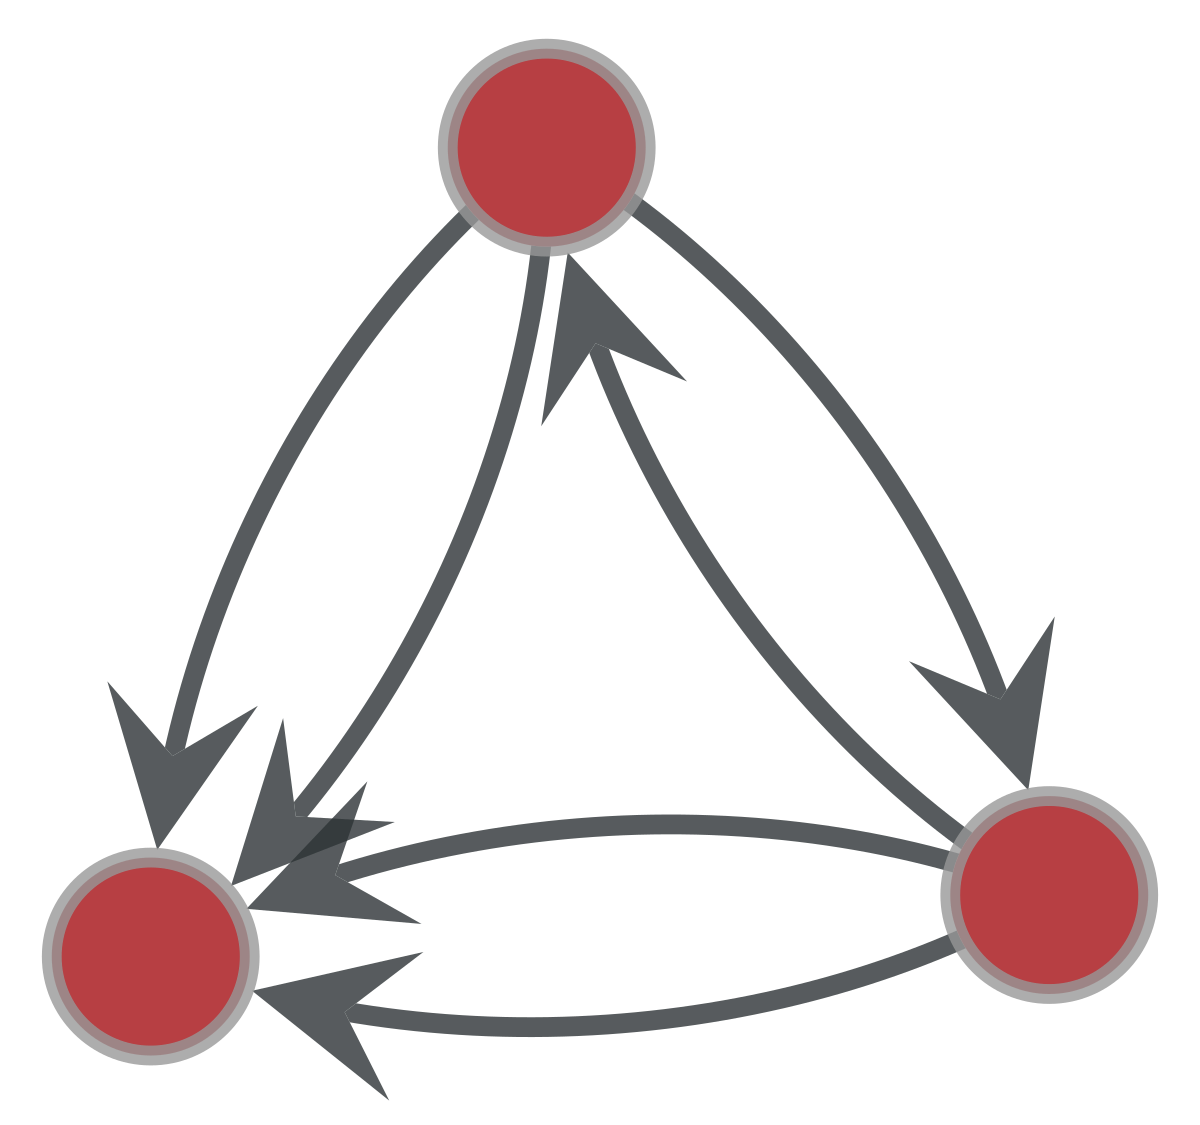

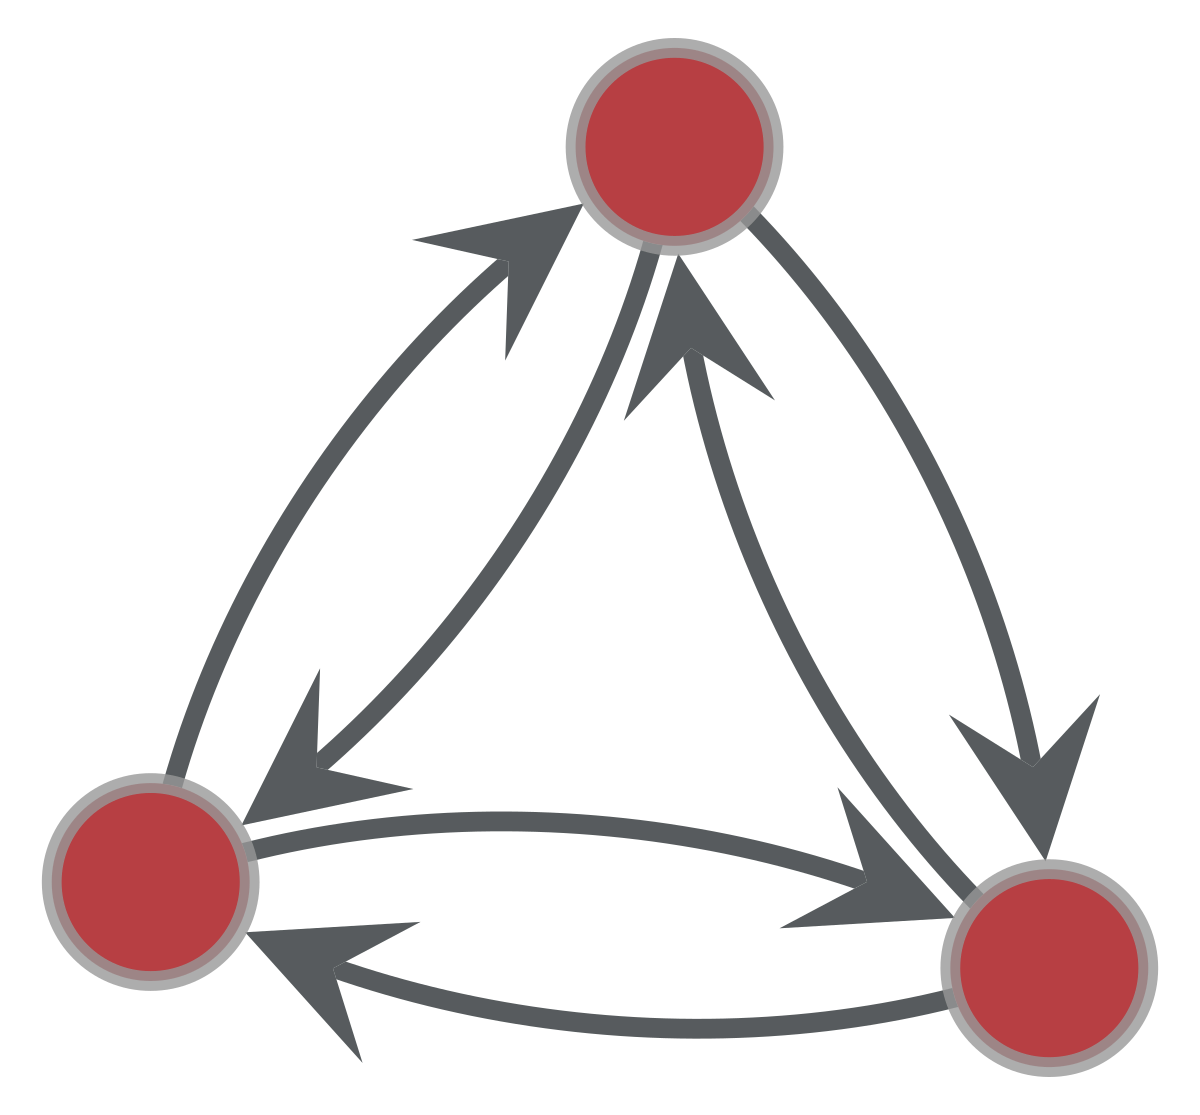

In [6]:
for i in worm_motif_graphs:
    gt.graph_draw(i)

In [7]:
# Analyzing the first edge
# for v in g_worm.vertices():
#     print(f'In degree: {v.in_degree()}')



# edgworm_objects = vert.all_edges()

# print('Edges of Vertex 0:')
# for e in edgworm_objects:
#     print(e)

In [8]:
print(g_fly.vp.name.a)

None
